## Grover's Benchmark

Notes :
1. using `grovers_benchmark.GroversBenchmark()` the amonunt of time required to generate the initial circuit grows exponentially with the number of qubits. Maybe there is a better way of doing it?
2. for `num_qubits=55` raises a ``QasmParseException: Instruction p(pi/8) with args ['q116[0]'] not implemented`` in the lsc-compiler stack

In [1]:
from grover import run, gen_benchmark_circuit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
for num_qubits in range(10,15):
    print(f"Generating grover_raw_{num_qubits}")
    qasm = gen_benchmark_circuit(num_qubits)
    print(f"Completed grover_raw_{num_qubits}")
    with open(f"grover/grover_raw_{num_qubits}.qasm", "w") as f:
        print(f"Writing to File: grover/grover_raw_{num_qubits}.qasm ")
        f.write(qasm)

Generating grover_raw_10


KeyboardInterrupt: 

In [2]:
benchmark_data = []
for num_qubits in [3,5,6,7,8,9,10]:
    benchmark_data.append(run(num_qubits))

print(benchmark_data)

Generated: 254 lines, 4457 chars for mnemonics and 1710 for shorthand LS
Time to generate: 0.06236433982849121s
Generated: 2450 lines, 42384 chars for mnemonics and 17863 for shorthand LS
Time to generate: 0.05361056327819824s
Generated: 6900 lines, 122590 chars for mnemonics and 54328 for shorthand LS
Time to generate: 0.10785579681396484s
Generated: 18462 lines, 337609 chars for mnemonics and 154038 for shorthand LS
Time to generate: 0.2304847240447998s
Generated: 55384 lines, 1025240 chars for mnemonics and 473096 for shorthand LS
Time to generate: 0.8372392654418945s
Generated: 156962 lines, 2982969 chars for mnemonics and 1415822 for shorthand LS
Time to generate: 2.3677525520324707s
Generated: 461320 lines, 8863182 chars for mnemonics and 4253872 for shorthand LS
Time to generate: 8.129653930664062s
[{'num_qubits': 3, 'lines': 254, 'chars_full': 4457, 'chars_sh': 1710, 'time': 0.06238675117492676}, {'num_qubits': 5, 'lines': 2450, 'chars_full': 42384, 'chars_sh': 17863, 'time': 0

In [3]:
print(benchmark_data)

[{'num_qubits': 3, 'lines': 254, 'chars_full': 4457, 'chars_sh': 1710, 'time': 0.06238675117492676}, {'num_qubits': 5, 'lines': 2450, 'chars_full': 42384, 'chars_sh': 17863, 'time': 0.05369091033935547}, {'num_qubits': 6, 'lines': 6900, 'chars_full': 122590, 'chars_sh': 54328, 'time': 0.10787820816040039}, {'num_qubits': 7, 'lines': 18462, 'chars_full': 337609, 'chars_sh': 154038, 'time': 0.23050856590270996}, {'num_qubits': 8, 'lines': 55384, 'chars_full': 1025240, 'chars_sh': 473096, 'time': 0.8372585773468018}, {'num_qubits': 9, 'lines': 156962, 'chars_full': 2982969, 'chars_sh': 1415822, 'time': 2.3677780628204346}, {'num_qubits': 10, 'lines': 461320, 'chars_full': 8863182, 'chars_sh': 4253872, 'time': 8.135318517684937}]


In [4]:
b_data_np = np.array([list(dic.values()) for dic in benchmark_data])

In [32]:
b_data_np[:,0]

array([ 3.,  5.,  6.,  7.,  8.,  9., 10.])

In [11]:
def quad_func(x,a,b, c):
    return a* x**2 + b*x+ c

def exponential(x,m,t,b):
    return m * np.exp(t * x) + b

from scipy.optimize import curve_fit
new_x = np.arange(3,11)

Text(0.5, 0.98, 'Grover Benchmark')

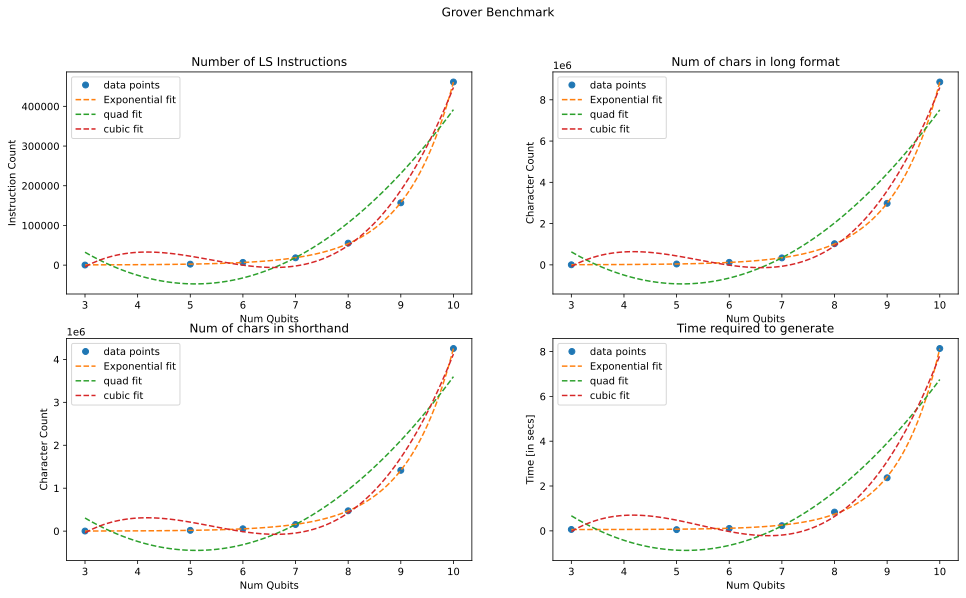

In [33]:

fig, axs = plt.subplots(2,2, figsize = (16,9))
titles = ["Number of LS Instructions", "Num of chars in long format", "Num of chars in shorthand", "Time required to generate"]
ylabels = ["Instruction Count", "Character Count", "Character Count", "Time [in secs]"]

for i,ax in enumerate(axs.flatten()):
    ax.plot(b_data_np[:,0], b_data_np[:,i+1], 'o', label ="data points")
    linspace = np.linspace(3,10, 100)

    #exponential fit
    popt, _ = curve_fit(exponential, b_data_np[:,0], b_data_np[:,i+1])
    ax.plot(linspace, exponential(linspace,*popt), '--', label = f"Exponential fit")

    # quadratic fit
    quad = np.polyfit(b_data_np[:,0], b_data_np[:,i+1], deg = 2)
    ax.plot(linspace, np.poly1d(quad)(linspace), '--' ,label="quad fit")

    # cubic fit
    cubic = np.polyfit(b_data_np[:,0], b_data_np[:,i+1], deg = 3)
    ax.plot(linspace, np.poly1d(cubic)(linspace), '--',label="cubic fit")

    # ax.plot()
    ax.set_title(titles[i])
    ax.set_xlabel("Num Qubits")
    ax.set_ylabel(ylabels[i])
    ax.legend()
fig.suptitle("Grover Benchmark")

The fit function might not be the right one. Should maybe do interpolate and guess the polynamial?


In [15]:
z= np.polyfit(b_data_np[:, 0], b_data_np[:,1], deg =2)

In [16]:
z[new_x]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [21]:
len(np.poly1d(z)(new_x)) == len(new_x)

True